## Notebook Imports and Packages

In [115]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('dark')

%matplotlib inline

In [102]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#  Example 1 -A simple cost function

##    $ f(x) = x^2 + x + 1 $

In [2]:
def f(x):
    return x**2 + x +1

In [3]:
x_1 = np.linspace(start=-3,stop=3,num=100)

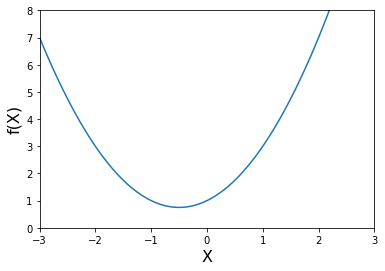

In [5]:
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X',fontsize=16)
plt.ylabel('f(X)',fontsize=16)
plt.plot(x_1,f(x_1))
plt.show()

# # Slope & Derivative

derivative of f(x) called df(x)

In [6]:
def df(x):
    return 2 * x + 1

Text(0.5, 1.0, 'df(x), Slope of f(x)')

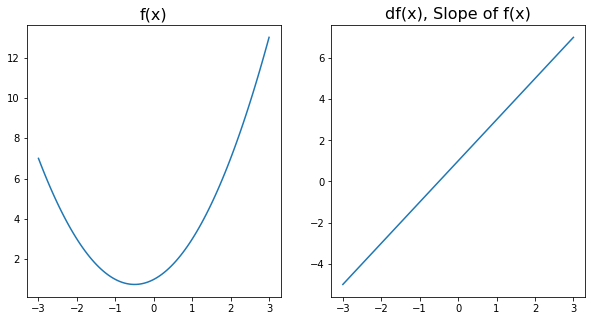

In [23]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

axes[0].plot(x_1,f(x_1))
axes[0].set_title('f(x)',fontsize=16)

axes[1].plot(x_1,df(x_1))
axes[1].set_title('df(x), Slope of f(x)',fontsize=16)

### Python Loops & Gradient Descent

In [42]:
# Gradient descent 

new_value= 3
previous_value= 0
learning_rate = 0.1
precision = 0.0001

x_list = [new_value]
gradient_list = [df(new_value)]

for n in range(50):
    
    previous_value = new_value
    gradient = df(previous_value)
    new_value = previous_value - learning_rate * gradient
    
    x_list.append(new_value)
    gradient_list.append(gradient)
    
    step_size = abs(new_value-previous_value)
    
    if step_size < precision :
        print('number of steps taken',n)
        break
    
print('gradient',gradient)
print('f(x) value,cost function', f(new_value))
print('x value',new_value)


number of steps taken 40
gradient 0.0009304595970494045
f(x) value,cost function 0.7500001385208099
x value -0.49962781616118024


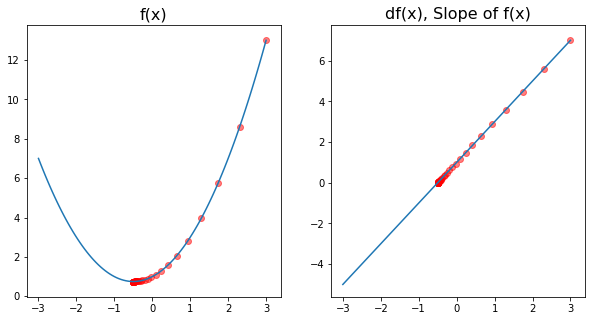

In [46]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

axes[0].plot(x_1,f(x_1))
axes[0].set_title('f(x)',fontsize=16)

#convert list to array
values = np.array(x_list)

axes[0].scatter(values,f(values),color='red',alpha=0.5)

axes[1].plot(x_1,df(x_1))
axes[1].set_title('df(x), Slope of f(x)',fontsize=16)

df_values = np.array(gradient_list)

axes[1].scatter(values,df(values),color='red',alpha=0.5)

# Example 2 - multiple minima vs intial guess and adavaced

## $$ g(x) = x^4 - 4x^2 + 5 $$

In [47]:
x_2 = np.linspace(-2,2,1000)

In [48]:
def g(x):
    return x**4 - 4 * x**2 +5
def dg(x):
    return 4 * x**3 - 8 * x
    

Text(0.5, 1.0, 'dg(x), Slope of g(x)')

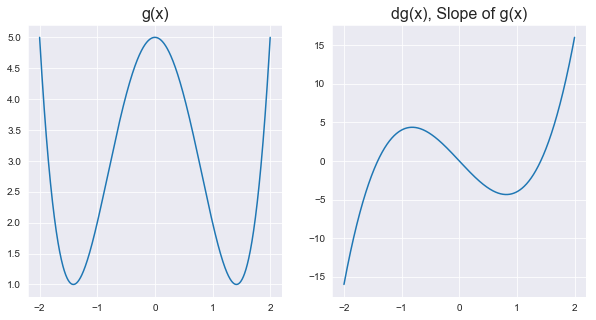

In [52]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

axes[0].plot(x_2,g(x_2))
axes[0].set_title('g(x)',fontsize=16)

#convert list to array
#values = np.array(x_list)

#axes[0].scatter(values,f(values),color='red',alpha=0.5)

axes[1].plot(x_2,dg(x_2))
axes[1].set_title('dg(x), Slope of g(x)',fontsize=16)

#df_values = np.array(gradient_list)

#axes[1].scatter(values,df(values),color='red',alpha=0.5)

# Gradient descet as a python function

In [94]:
# Gradient descent 

def gradient_descent(derviative_func,intial_gues,learning_rate=0.02,precision=0.001,max_iter=300):
    
    new_value= intial_gues
    previous_value= 0
    
    
    x_list = [new_value]
    gradient_list = [derviative_func(new_value)]

    for n in range(max_iter):

        previous_value = new_value
        gradient = derviative_func(previous_value)
        new_value = previous_value - learning_rate * gradient

        x_list.append(new_value)
        gradient_list.append(derviative_func(new_value))

        step_size = abs(new_value-previous_value)

        if step_size < precision :
            #print('number of steps taken',n)
            break
    return new_value,x_list,gradient_list

In [82]:
local_min,list_x,gradient_list = gradient_descent(dg,1)

print('Local minima(x) at:',local_min)
print('Number of steps taken:', len(list_x))


Local minima(x) at: 1.4123561169514727
Number of steps taken: 17


In [83]:
local_min #,list_x,gradient_list

1.4123561169514727

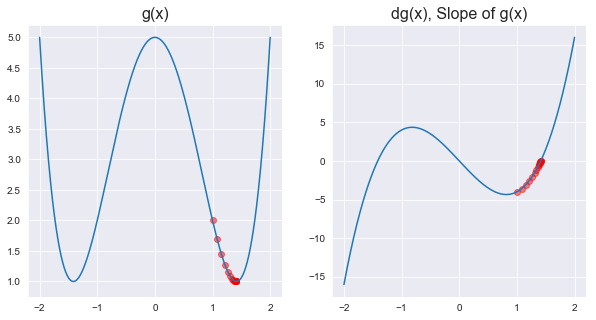

In [84]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

axes[0].plot(x_2,g(x_2))
axes[0].set_title('g(x)',fontsize=16)

#convert list to array
values = np.array(list_x)

axes[0].scatter(values,g(values),color='red',alpha=0.5)

axes[1].plot(x_2,dg(x_2))
axes[1].set_title('dg(x), Slope of g(x)',fontsize=16)

df_values = np.array(gradient_list)

axes[1].scatter(values,df_values,color='red',alpha=0.5)

# Example 3 - Divergence,Overflow and python Tuple

## $$ h(x) = x^5 -2x^4 +2  $$

In [85]:
x_3 = np.linspace(start=2.5,stop=-2.5,num=1000)

def h(x):
    return x**5 - 2 * x**4 +2
def dh(x):
    return 5* x**4 -8* x **3

Local minima(x) at: 1.5987020901995501
Cost at local minuma: -0.6214227779738852
Number of steps taken: 18


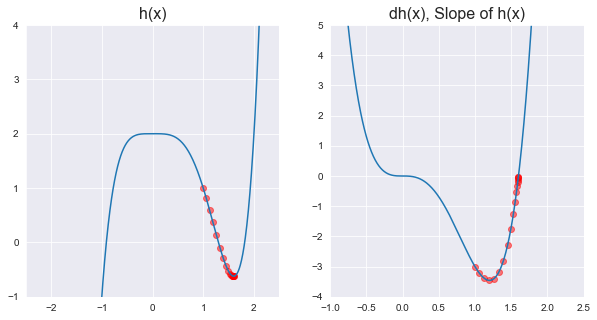

In [97]:

local_min,list_x,gradient_list = gradient_descent(dh,1)

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

axes[0].plot(x_3,h(x_3))
axes[0].set_title('h(x)',fontsize=16)
axes[0].set_xlim(-2.5,2.5)
axes[0].set_ylim(-1,4)

#convert list to array

values = np.array(list_x)

axes[0].scatter(values,h(values),color='red',alpha=0.5)

axes[1].plot(x_3,dh(x_3))
axes[1].set_title('dh(x), Slope of h(x)',fontsize=16)
axes[1].set_xlim(-1,2.5)
axes[1].set_ylim(-4,5)

df_values = np.array(gradient_list)

axes[1].scatter(values,df_values,color='red',alpha=0.5)

print('Local minima(x) at:',local_min)
print('Cost at local minuma:', h(local_min))
print('Number of steps taken:', len(list_x))

# Example 4 -3D viz

## Minimise $$ f(x,y) = \frac {1}{3^{-x^2-y^2} +1}  $$

$$f(x,y) = \frac {1}{r+1} $$

## where r is $$ 3^{-x^2 - y^2} $$

In [98]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1/ (r +1)

In [109]:
# make data

x_4 = np.linspace(start=-2,stop=2,num=200)
y_4 = np.linspace(start=-2,stop=2,num=200)

x_4,y_4 = np.meshgrid(x_4,y_4)


array([[-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       ...,
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ]])

.

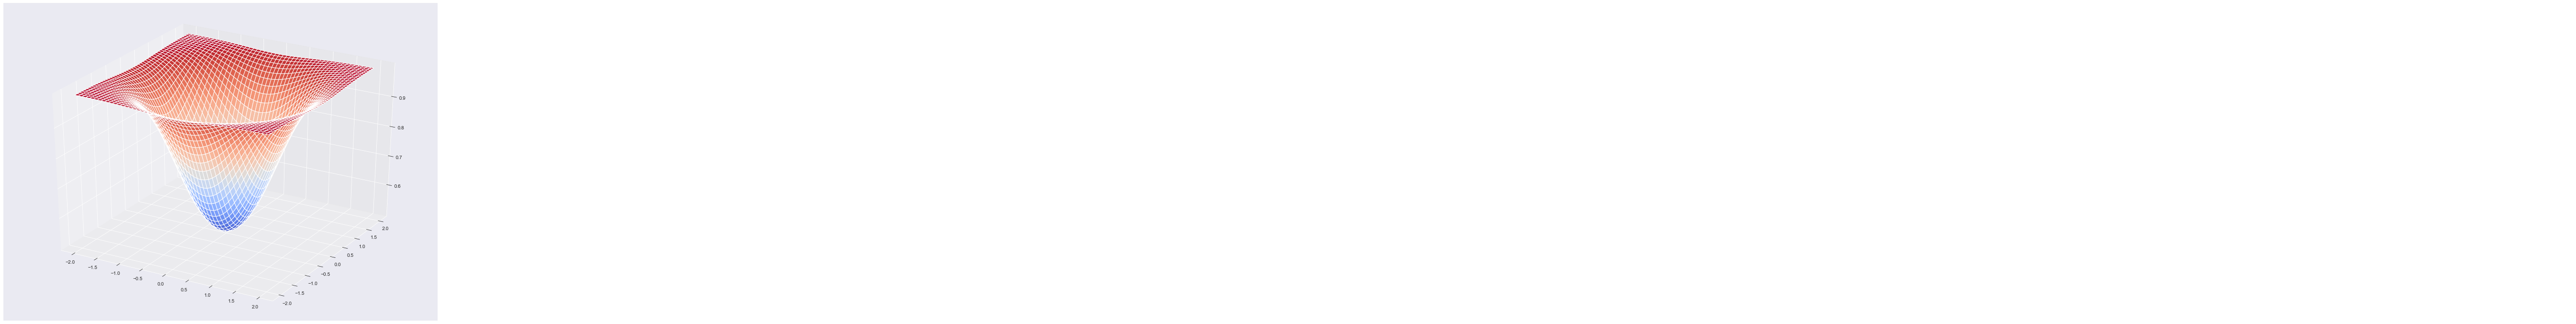

In [116]:
# generating 3d plot
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')

ax.plot_surface(x_4,y_4,f(x_4,y_4),cmap='coolwarm')
plt.show()